# 1.Setup

In [26]:
import tensorflow as tf
import os

In [27]:
!pip list

/bin/bash: /home/admpdi/anaconda3/envs/tf/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)


Package                       Version
----------------------------- ---------
absl-py                       1.4.0
asttokens                     2.2.1
astunparse                    1.6.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
cachetools                    5.3.1
certifi                       2023.7.22
charset-normalizer            3.2.0
contourpy                     1.1.0
cycler                        0.11.0
debugpy                       1.5.1
decorator                     5.1.1
executing                     1.2.0
flatbuffers                   23.5.26
fonttools                     4.41.1
gast                          0.4.0
google-auth                   2.22.0
google-auth-oauthlib          1.0.0
google-pasta                  0.2.0
grpcio                        1.56.2
h5py                          3.9.0
idna                          3.4
importlib-metadata            6.8.0
ipykernel                     6.15.0
ipython                       8.14.0
jax         

In [28]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# Define set_memory_growth que mantenha o consumo do memoria da gpu no minimo ou que seja necessario.
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


# 2. Elimina imagens corrompidas

In [29]:
import cv2
import imghdr

In [30]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [31]:
# De acordo aos formatos determinados em image.exts qualquera que não esteja nesse formato será eliminado
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
#data = tf.keras.utils.image_dataset_from_directory('data')
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=64,image_size= (256,256))
#Cria um "generator" dentro da variavel data, mostrando a quantidade de arquivos e classes que têm como seu formato especifico 

Found 6237 files belonging to 3 classes.


In [34]:
data_iterator = data.as_numpy_iterator()
#A partir do generator se pode convertir em um registro dos dados que queremos(as_numpy_iterator)

2023-08-01 10:04:19.878559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6237]
	 [[{{node Placeholder/_0}}]]
2023-08-01 10:04:19.879045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6237]
	 [[{{node Placeholder/_0}}]]


In [35]:
data_iterator

In [36]:
# Utilizando os numpy iterator se pode obter o lote de dados(seria como tamanho de matiz dos diferentes lote de dados) os diferentes tamanhos
#dos lotes podem ser configurados utilizando
batch = data_iterator.next()

2023-08-01 10:04:20.381969: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331648 exceeds 10% of free system memory.


In [37]:
batch

(array([[[[135.75, 135.75, 135.75],
          [ 78.  ,  78.  ,  78.  ],
          [ 75.5 ,  75.5 ,  75.5 ],
          ...,
          [255.  , 255.  , 255.  ],
          [255.  , 255.  , 255.  ],
          [146.5 , 146.5 , 146.5 ]],
 
         [[153.75, 153.75, 153.75],
          [127.5 , 127.5 , 127.5 ],
          [ 63.75,  63.75,  63.75],
          ...,
          [255.  , 255.  , 255.  ],
          [255.  , 255.  , 255.  ],
          [146.5 , 146.5 , 146.5 ]],
 
         [[ 92.  ,  92.  ,  92.  ],
          [191.25, 191.25, 191.25],
          [  0.  ,   0.  ,   0.  ],
          ...,
          [255.  , 255.  , 255.  ],
          [255.  , 255.  , 255.  ],
          [146.5 , 146.5 , 146.5 ]],
 
         ...,
 
         [[219.  , 219.  , 219.  ],
          [191.75, 191.75, 191.75],
          [210.75, 210.75, 210.75],
          ...,
          [237.25, 237.25, 237.25],
          [220.25, 220.25, 220.25],
          [130.  , 130.  , 130.  ]],
 
         [[237.  , 237.  , 237.  ],
          [2

In [38]:
#Images represented as numpy arrays
batch[0].shape

(64, 256, 256, 3)

In [39]:
#batch[0] contem a matrices dos dados e batch[1] contem o seu label e classificação
batch[1]

array([0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0, 2],
      dtype=int32)

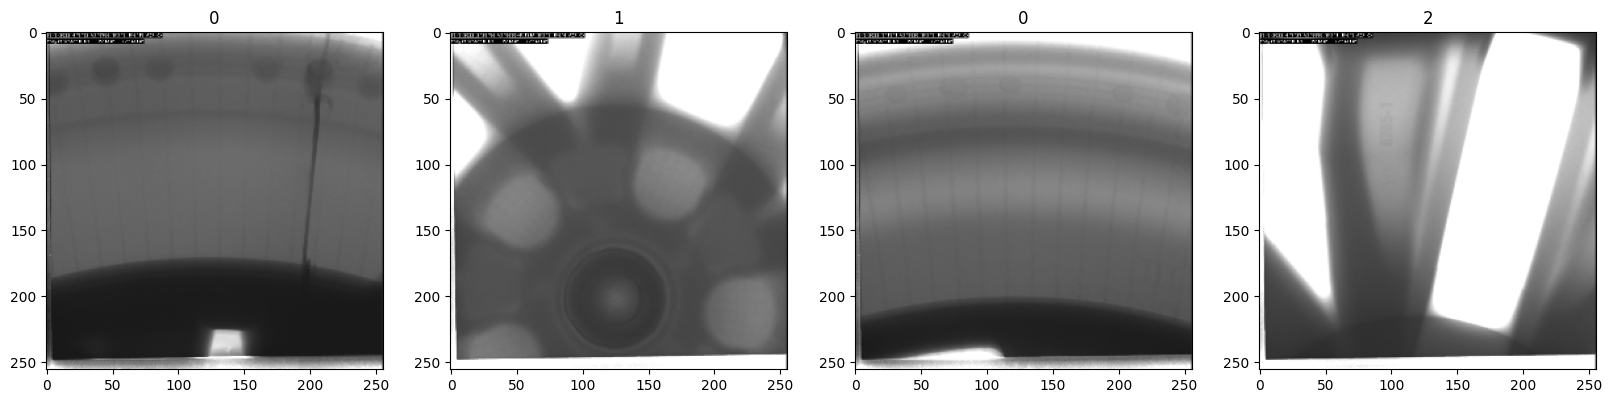

In [40]:
#class 0 aro
#class 1 cubo
#class 2 raio

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [41]:
#Utiliza uma transformação do dados utilizando y=x/255 deixando os valores dos dados de 0 a 1
data = data.map(lambda x,y: (x/255, y))

In [42]:
#scaled_iterator=data.as_numpy_iterator()

In [43]:
#batch=scaled_iterator.next()

In [44]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [45]:
len(data)

98

In [46]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [47]:
#Traino
train_size

68

In [48]:
#Validação 
val_size

20

In [49]:
#Teste final
test_size

9

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [51]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 6. Build Deep Learning Model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [56]:
#Variables 
INPUT_SHAPE = (256, 256, 3);
BATCH_SIZE = 32;
FILTER1_SIZE=32;
FILTER2_SIZE=64;
FILTER_SHAPE=(2,2);
POOL_SHAPE = (2, 2);
FULLY_CONNECT_NUM=128;
NUM_CLASSES=3;

model = Sequential()

model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu',input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu',input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))

model.add(Flatten())

model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

2023-08-01 10:11:34.949748: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 124.03MiB (rounded to 130056192)requested by op StatelessRandomUniformV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-08-01 10:11:34.949840: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-08-01 10:11:34.949873: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 44, Chunks in use: 44. 11.0KiB allocated for chunks. 11.0KiB in use in bin. 1.4KiB client-requested in use in bin.
2023-08-01 10:11:34.949898: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 1, Chunks in use: 0. 768B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-08-01 10:11:34.949920: I tensorflow/tsl/framew

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[254016,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

In [54]:
from tensorflow.keras.metrics import Precision, Recall
METRICS = metrics=['accuracy',Precision(name='precision'),Recall(name='recall')]

#Adam é um tipo de optimizador (tem outras opções)
model.compile(optimizer='adam', loss='sparse_categorial_crossentropy', metrics=METRICS)

In [ ]:
model.summary()

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
val

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

# 8. Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('00.01.23P228604W36V1I10A0S0M0N8562-nR1E0Othund.bmp')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
match yhat:
    case 0:
       print(f'Predicted class is aro') 
    case 1:
        print(f'Predicted class is cubo')
    case 2:
        print(f'Predicted class is raio')

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))